# Text Data Exploring

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

In [3]:
health_insurance_df = pd.read_csv('/Users/liumingqian/anly-501-project-liumingqian0511/data/01-modified-data/text.csv')
vec = pd.read_csv('/Users/liumingqian/anly-501-project-liumingqian0511/data/01-modified-data/vec.csv')
words_freq_df = pd.read_csv('/Users/liumingqian/anly-501-project-liumingqian0511/data/01-modified-data/word_frequency_text.csv')

In [4]:
corpus_str = ""
corpus = []
health_insurance_df['text'].apply(lambda x: corpus.append(x))
corpus_str = corpus_str.join(corpus)

In [5]:
vec_20 = vec[words_freq_df['word'][:20]]
vec_20.head(10)



,co,cigna,aetna,anthem,unitedhealth,health,get,group,amp,plan,company,insurance,healthcare,national,year,call,unh,help,make,cv
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7,1,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
8,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


## Correlation Heatmap

**Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. I subset the vectorized dataframe by the top 20 frequent words and generated a correlation heatmap. The darker the square is, the stronger positive correlation exists between the corresponding two words.**

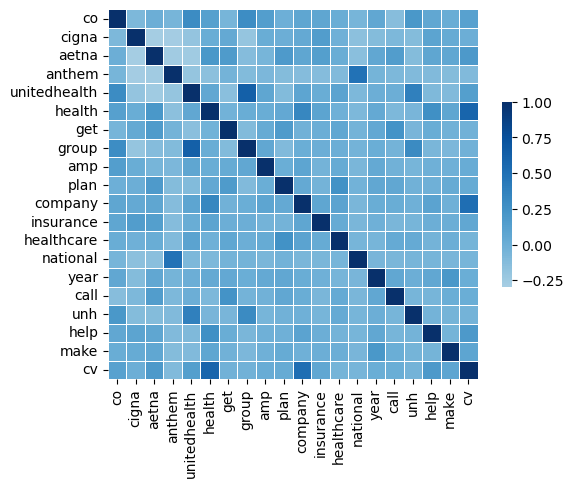

In [6]:
corr=vec_20.corr()
# # Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, cmap='Blues')
plt.show()


## Word Frequncy Displaying
- Barplot
  
- WordCloud

Both barplot and WordCloud are generated on the subsetted vectorized data. They visualize the top 20 frequent words in the data set. We can see the result from these two visualizing is just the same but in different presentation.

<function matplotlib.pyplot.show(close=None, block=None)>

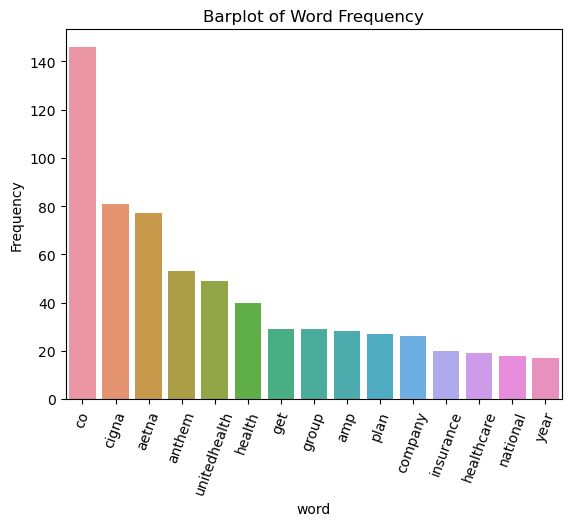

In [7]:
plot = sns.barplot(data=words_freq_df.iloc[:15,:],x='word',y='Frequency')
plt.xticks(rotation=70)
plot.set_title('Barplot of Word Frequency')
plt.show


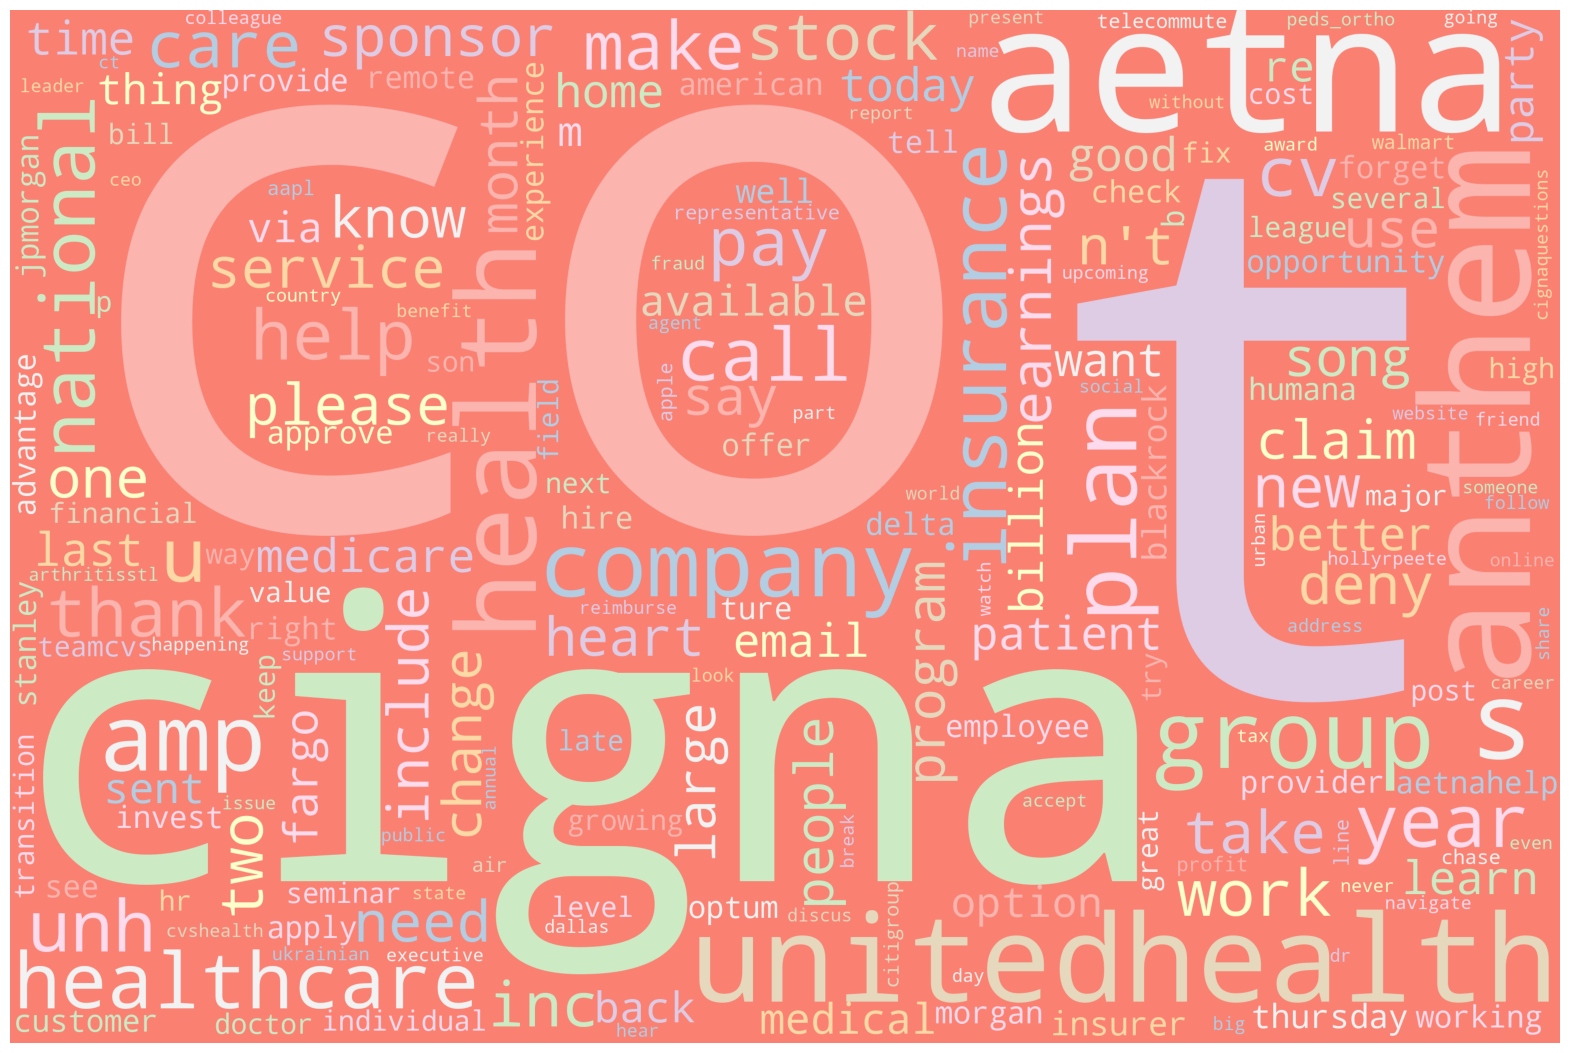

In [8]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000, 
    random_state=1,
    background_color='salmon', 
    colormap='Pastel1', 
    collocations=False,
    stopwords = STOPWORDS).generate(corpus_str)
plt.figure(figsize=(20, 15))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()